In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

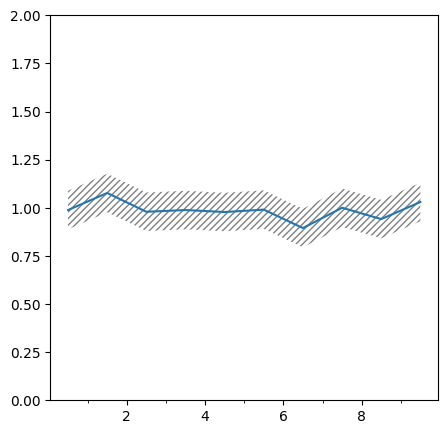

In [61]:
fig, ax = plt.subplots(1,1, figsize=[5,5])
bins = np.array(range(11))
binwidth= np.ediff1d(bins)
x = bins[:-1]+0.5*binwidth
y = np.random.normal(1, scale=0.05, size=len(x))
systDown = 0.1
systUp = 0.1
ax.plot(x, y);
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.fill_between(x, y - systDown, y + systUp, hatch='/'*5, color='gray', linewidth=0, facecolor=(0, 0, 0, 0.0));
ax.set_ylim(0,2);

In [98]:
systUp = np.random.normal(0.05, 0.02, len(x))
systDown = np.random.normal(0.05, 0.02, len(x))

# Let's set the varition of the last bin to nan
systDown[-1] = np.nan
systUp[-1] = np.nan

# Let's set the variation of two adiacent bins to nan
systDown[2] = np.nan
systUp[2] = np.nan

unc_band = np.array([1-systDown, 1+systUp])
unc_band

array([[0.93327674, 0.98885104,        nan, 0.93946285, 0.94494261,
        0.97472851, 0.95673838, 0.91304259, 0.94883579,        nan],
       [1.05671335, 1.04978471,        nan, 1.05680564, 1.05935301,
        1.06770941, 1.02074725, 1.06566128, 1.06563644,        nan]])

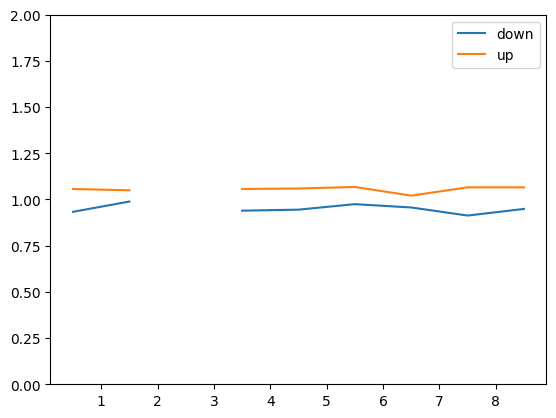

In [99]:
plt.plot(x, unc_band[0], label="down")
plt.plot(x, unc_band[1], label="up")
plt.ylim(0,2)
plt.legend();

In [100]:
unc_band[0]

array([0.93327674, 0.98885104,        nan, 0.93946285, 0.94494261,
       0.97472851, 0.95673838, 0.91304259, 0.94883579,        nan])

In [101]:
np.r_[unc_band[0], unc_band[0, -1]]

array([0.93327674, 0.98885104,        nan, 0.93946285, 0.94494261,
       0.97472851, 0.95673838, 0.91304259, 0.94883579,        nan,
              nan])

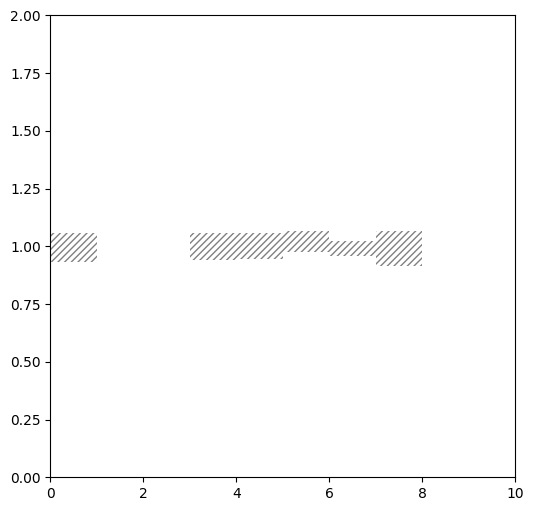

In [103]:
fig, ax = plt.subplots(1,1, figsize=[6,6])
down = np.r_[unc_band[0], unc_band[0, -1]]
up = np.r_[unc_band[1], unc_band[1, -1]]
ax.fill_between(bins, down, up, hatch='/'*5, color='gray', linewidth=0, facecolor=(0, 0, 0, 0.0), step="post")
plt.xlim(0,10);
plt.ylim(0,2);

In [105]:
up = np.array([0])
nom = np.array([0])
up/nom

/tmp/ipykernel_66325/306848190.py:3: RuntimeWarning: invalid value encountered in true_divide
  up/nom


array([nan])

In [111]:
unc_band_padded = np.where(~np.isnan(unc_band), unc_band, 1)
unc_band_padded

array([[0.93327674, 0.98885104, 1.        , 0.93946285, 0.94494261,
        0.97472851, 0.95673838, 0.91304259, 0.94883579, 1.        ],
       [1.05671335, 1.04978471, 1.        , 1.05680564, 1.05935301,
        1.06770941, 1.02074725, 1.06566128, 1.06563644, 1.        ]])

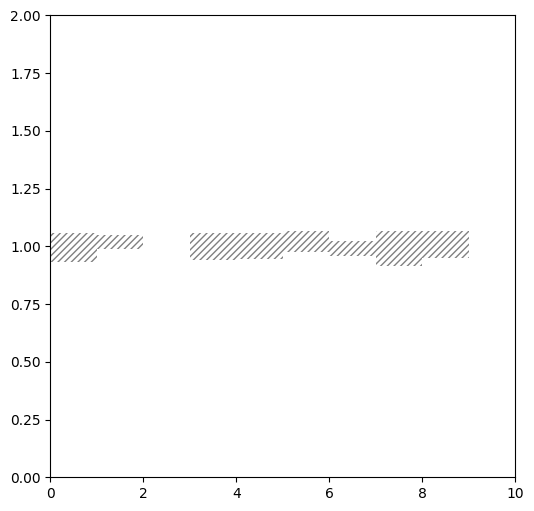

In [112]:
fig, ax = plt.subplots(1,1, figsize=[6,6])
down = np.r_[unc_band_padded[0], unc_band_padded[0, -1]]
up = np.r_[unc_band_padded[1], unc_band_padded[1, -1]]
ax.fill_between(bins, down, up, hatch='/'*5, color='gray', linewidth=0, facecolor=(0, 0, 0, 0.0), step="post")
plt.xlim(0,10);
plt.ylim(0,2);